In [1]:
import mediapipe as mp

import pandas as pd 

import numpy as np

import cv2

import matplotlib.pyplot as plt

import csv

import time

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

import pickle

GETTING THE POINTS FOR HAND

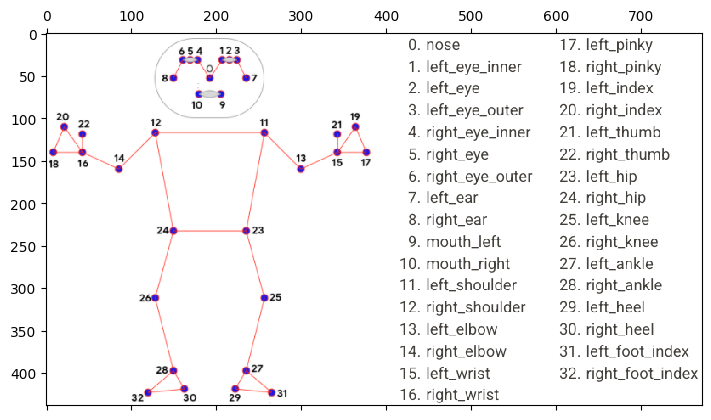

In [2]:
img = cv2.imread("mediapipe_pose_landmarks_index.png")
plt.matshow(img)


CREATE A TRAINFILE

In [3]:
hand_landmarks = [11,13,15,17,19,21,12,14,16,18,20,22]
train_csv = "posture_class.csv"


In [115]:


length = len(hand_landmarks)

s = ["class"]
for i in range(length):
     s.append(f'x{i}')
     s.append(f'y{i}')
     s.append(f'z{i}')
     s.append(f'v{i}')
with open(train_csv,mode='w',newline='') as f:
    csv_file = csv.writer(f,delimiter = ',',quotechar = '"', quoting = csv.QUOTE_MINIMAL)
    csv_file.writerow(s)

In [6]:
mp_hos = mp.solutions.holistic
mp_draw = mp.solutions.drawing_utils

COLLECTING THE DATA

In [21]:
classes = {0 : "None" , 1 :"up" , 2 : "down", 3 : "left", 4 : "right" , 5 : "shoot" }

In [24]:
num_images = 2000
cap = cv2.VideoCapture(0)

with mp_hos.Holistic(min_detection_confidence = 0.5 , min_tracking_confidence = 0.5) as model:

    for j in range(1):
        
        print(f"collecting data for {classes[5]}")

        time.sleep(10)


        for i in range(num_images):
            ret, frame = cap.read()
            
    

            try :
                detection_results = model.process( cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
                landmarks = detection_results.pose_landmarks.landmark
            
                s = []
                for i in hand_landmarks:
                    s.append([landmarks[i].x ,landmarks[i].y , landmarks[i].z , landmarks[i].visibility] )
                            
                s = np.array(s).flatten()
                s = np.insert(s,0,5)      
    
                with open(train_csv , mode = 'a',newline = '') as f:
    
                    csv_file = csv.writer(f,delimiter = ',',quotechar = '"' , quoting = csv.QUOTE_MINIMAL)
                    csv_file.writerow(s)

            except:
                pass

            
    
            # for face
            #mp_draw.draw_landmarks(frame , detection_results.face_landmarks , mp_hos.FACEMESH_CONTOURS,
            #                     mp_draw.DrawingSpec(color = (0,0,0) , thickness = 1,circle_radius = 1),
            #                    mp_draw.DrawingSpec(color = (0,0,255),thickness = 1 , circle_radius = 1))
    
    
            
            
            mp_draw.draw_landmarks(frame , detection_results.pose_landmarks , mp_hos.POSE_CONNECTIONS)
            
            
    
            cv2.imshow('windows', frame)
            
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()

collecting data for shoot


TRAIN A SKLEARN MODEL USING COLLECTED DATA

In [35]:
data = pd.read_csv("posture_class.csv")

x = np.array(data.drop(["class"],axis='columns'))

y = np.array(data['class'])


In [36]:
train_x , test_x , train_y ,test_y = train_test_split(x , y,test_size= 0.1 )

In [ ]:
model1 = LogisticRegression(max_iter = 14000)
model1.fit(train_x,train_y)

In [ ]:
data = data[data["class"] != 5]
len(data)

In [34]:
data.to_csv("posture_class.csv",index = False)

In [29]:
model1.score(test_x,test_y)

0.9175035868005739

SAVE THE MODEL USING PICKLE FOR DETECTON

In [30]:
pickle.dump(model1 , open("direction_of_motion_detctor.pkl" , "wb") )